### 1. Exploring `HR_Dataset`

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
hr_dataset = pd.read_csv('data/HR_Dataset.csv')
pd.options.display.max_columns = None
hr_dataset.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [97]:
# let's clean the database = dtypes:
hr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [98]:
hr_dataset.duplicated().sum()

0

In [99]:
hr_dataset.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

___
___
### 2. Checking database mistakes

2.1. `MaritalStatusID`, `MaritalDesc` and `MarriedID`

2.2. `Termd`, `EmploymentStatus`, `DateofTermination` and `EmpStatusID`

2.3. `GenderID` and `Sex`
___

2.1. Checking if `MaritalStatusID` matches with `MaritalDesc`

In [100]:
# Checking (visual) if value_counts matches:
print(f"MaritalStatusID values: \n\n{hr_dataset['MaritalStatusID'].value_counts()}")
print("------------------------------------\n")
print(f"MaritalDesc values: \n\n{hr_dataset['MaritalDesc'].value_counts()}")

# it seems to be

MaritalStatusID values: 

0    137
1    124
2     30
3     12
4      8
Name: MaritalStatusID, dtype: int64
------------------------------------

MaritalDesc values: 

Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: MaritalDesc, dtype: int64


In [101]:
# Creating a dict for checking manually if they are grouped as expected:
marital_desc_dict = dict(zip(hr_dataset['MaritalDesc'],hr_dataset['MaritalStatusID']))
marital_desc_dict
#it seems to be

{'Single': 0, 'Married': 1, 'Divorced': 2, 'Widowed': 4, 'Separated': 3}

In [102]:
for key, value in zip(hr_dataset['MaritalStatusID'],hr_dataset['MaritalDesc']):
    if key == marital_desc_dict[value]:
        continue
    else:
        print(hr_dataset['EmpID'])

# it seems to be perfect

In [103]:
#let's check more efficently:
pd.crosstab(hr_dataset['MaritalStatusID'], [hr_dataset['MarriedID'], hr_dataset['MaritalDesc']], rownames = ['MaritalStatusID'], colnames = ['MarriedID','MaritalDesc']) 

MarriedID              0                                1
MaritalDesc     Divorced Separated Single Widowed Married
MaritalStatusID                                          
0                      0         0    137       0       0
1                      0         0      0       0     124
2                     30         0      0       0       0
3                      0        12      0       0       0
4                      0         0      0       8       0

___
2.2. Check between `Termd`, `EmploymentStatus`, `DateofTermination` and 	`EmpStatusID`

In [104]:
pd.crosstab(hr_dataset['EmpStatusID'], [hr_dataset['Termd'], hr_dataset['EmploymentStatus']], rownames = ['EmpStatusID'], colnames = ['Termd', 'EmploymentStatus'])

Termd                 0                    1                       
EmploymentStatus Active Terminated for Cause Voluntarily Terminated
EmpStatusID                                                        
1                   182                    2                      0
2                    11                    0                      0
3                    14                    0                      0
4                     0                   14                      0
5                     0                    0                     88

In [105]:
pd.crosstab(hr_dataset['Termd'], hr_dataset['DateofTermination'])

DateofTermination,1/11/2014,1/12/2014,1/12/2017,1/15/2016,1/2/2012,1/26/2016,1/7/2013,1/9/2013,1/9/2014,10/22/2011,10/25/2015,10/31/2014,10/31/2015,11/10/2018,11/11/2016,11/14/2015,11/15/2015,11/15/2016,11/30/2012,11/4/2015,12/12/2015,12/15/2015,12/28/2017,2/12/2016,2/19/2016,2/21/2016,2/22/2017,2/25/2018,2/4/2013,2/5/2016,2/8/2012,2/8/2016,3/15/2015,3/31/2014,4/1/2013,4/1/2016,4/15/2013,4/15/2015,4/15/2018,4/24/2014,4/29/2018,4/4/2014,4/6/2017,4/7/2012,4/7/2018,4/8/2015,5/1/2016,5/1/2018,5/14/2012,5/15/2014,5/17/2016,5/18/2016,5/25/2016,5/30/2011,6/15/2013,6/16/2016,6/18/2013,6/24/2013,6/25/2015,6/27/2015,6/29/2015,6/4/2015,6/4/2018,6/5/2013,6/6/2017,6/8/2016,7/2/2014,7/30/2018,7/8/2017,8/13/2018,8/15/2015,8/19/2012,8/19/2013,8/19/2018,8/2/2014,8/30/2010,8/4/2017,8/7/2014,9/1/2015,9/12/2015,9/15/2015,9/15/2016,9/19/2016,9/23/2016,9/24/2012,9/25/2013,9/26/2011,9/26/2017,9/26/2018,9/27/2018,9/29/2015,9/4/2014,9/5/2015,9/5/2016,9/6/2016,9/7/2015
Termd,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,2


It seems that ID 4 and 5 in `EmpStatusID` means that are terminated and indicates the reason. Let's check the relation between `EmpStatusID` == 1 | 2 | 3 and another field. 

In [106]:
pd.crosstab(hr_dataset['EmpStatusID'], [hr_dataset['Termd'], hr_dataset['EmploymentStatus']], rownames = ['EmpStatusID'], colnames = ['Termd', 'EmploymentStatus'])

Termd                 0                    1                       
EmploymentStatus Active Terminated for Cause Voluntarily Terminated
EmpStatusID                                                        
1                   182                    2                      0
2                    11                    0                      0
3                    14                    0                      0
4                     0                   14                      0
5                     0                    0                     88

In [107]:
check_empstatusid = hr_dataset[(hr_dataset['EmpStatusID'] == 1) | (hr_dataset['EmpStatusID'] == 2) | (hr_dataset['EmpStatusID'] == 3)]

In [108]:
pd.crosstab(check_empstatusid['EmpStatusID'], check_empstatusid['CitizenDesc'])

CitizenDesc,Eligible NonCitizen,Non-Citizen,US Citizen
EmpStatusID,,,
1,7,1,176
2,0,0,11
3,0,0,14


In [109]:
pd.crosstab(check_empstatusid['EmpStatusID'], check_empstatusid['TermReason'])

TermReason,Fatal attraction,N/A-StillEmployed,"no-call, no-show"
EmpStatusID,,,
1,1,182,1
2,0,11,0
3,0,14,0


There's relation between `Termd`, `EmploymentStatus`and `DateofTermination` but it is not clear the relation of them with `EmpStatusID`.

___
2.3. Checking `GenderID` and `Sex`

In [110]:
pd.crosstab(hr_dataset['GenderID'], hr_dataset['Sex']) 

Sex,F,M
GenderID,,
0,176,0
1,0,135


___
___
### 3. Data clean

3.1. Replacing `0-1` for `No-Yes`

3.2. `HispanicLatino` data format

3.3. Date fields format

3.4. Exporting cleaned data base
___

3.1. Replacing `0-1` for `No-Yes`.

In [111]:
conv_bool = {0: 'No', 1: 'Yes'}

In [112]:
hr_dataset['MarriedID'] = hr_dataset['MarriedID'].map(conv_bool)
hr_dataset['Termd'] = hr_dataset['Termd'].map(conv_bool)
hr_dataset['FromDiversityJobFairID'] = hr_dataset['FromDiversityJobFairID'].map(conv_bool)
hr_dataset.sample(1)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
57,"Costello, Frank",10193,Yes,1,1,1,3,3,No,83552,No,9,Data Analyst,MA,1810,08/26/86,M,Married,US Citizen,No,White,3/30/2015,NaN,N/A-StillEmployed,Active,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,3.04,3,6,1/22/2019,0,2


___
3.2. `HispanicLatino` data format.

In [113]:
hr_dataset['HispanicLatino'].unique()

array(['No', 'Yes', 'no', 'yes'], dtype=object)

In [114]:
hr_dataset['HispanicLatino'] = hr_dataset['HispanicLatino'].apply(lambda x: x.title())

In [115]:
hr_dataset['HispanicLatino'].unique()

array(['No', 'Yes'], dtype=object)

___
3.3. Date fields format

In [116]:
hr_dataset['DOB'] = pd.to_datetime(hr_dataset['DOB'], format='%m/%d/%y')

In [117]:
def conv_dates(df, *cols):
    for col in cols:
        df[col] = pd.to_datetime(df[col], format='%m/%d/%Y')

In [118]:
conv_dates(hr_dataset, 'DateofHire', 'DateofTermination', 'LastPerformanceReview_Date')

In [119]:
hr_dataset.dtypes

Employee_Name                         object
EmpID                                  int64
MarriedID                             object
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                object
Salary                                 int64
Termd                                 object
PositionID                             int64
Position                              object
State                                 object
Zip                                    int64
DOB                           datetime64[ns]
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                    datetime64[ns]
DateofTerm

In [120]:
hr_dataset[['DateofHire', 'DateofTermination']].describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max
DateofHire,311,2013-02-03 22:50:32.797427712,2006-01-09,2011-07-11 00:00:00,2013-02-18,2014-09-23 12:00:00,2018-07-09
DateofTermination,104,2015-06-14 11:46:09.230769152,2010-08-30,2014-01-10 12:00:00,2015-09-22,2016-09-08 06:00:00,2018-11-10


___
3.4. Exporting cleaned data base

In [121]:
hr_dataset.to_csv('data/HR_Dataset_clean.csv')

___
___
## 4. ANALYSIS QUESTIONS:

### Engagement
- Relation between `EngagementSurvey` and `SpecialProjectsCount`?
- Relation between `EmpSatisfaction` and `SpecialProjectsCount`?
- Relation between `Absences` and `EngagementSurvey`?
- Relation between `DaysLateLast30` and `EngagementSurvey`?
- Relation between `PerformanceScore` and `EmpSatisfaction`?
- Relation between `LastPerformanceReview_Date` and `ManagerID`?
- Relation between `EmpSatisfaction` and `Salary`?

### Attrition
- Relation between `Termd` and `ManagerID`?
- Relation between `Termd` and `Position`?
- Relation between `Termd` and `Department`?

### Diversity
- What is the overall diversity `Sex` profile of the organization?
- What is the overall diversity `RaceDesc` profile of the organization?

### Workers differencies
- Relation between `RecruitmentSource` and `Salary`?
- Relation between `Sex` and `Salary`?
- Relation between `RaceDesc` and `Salary`?
- Relation between `Department` and `Salary`?

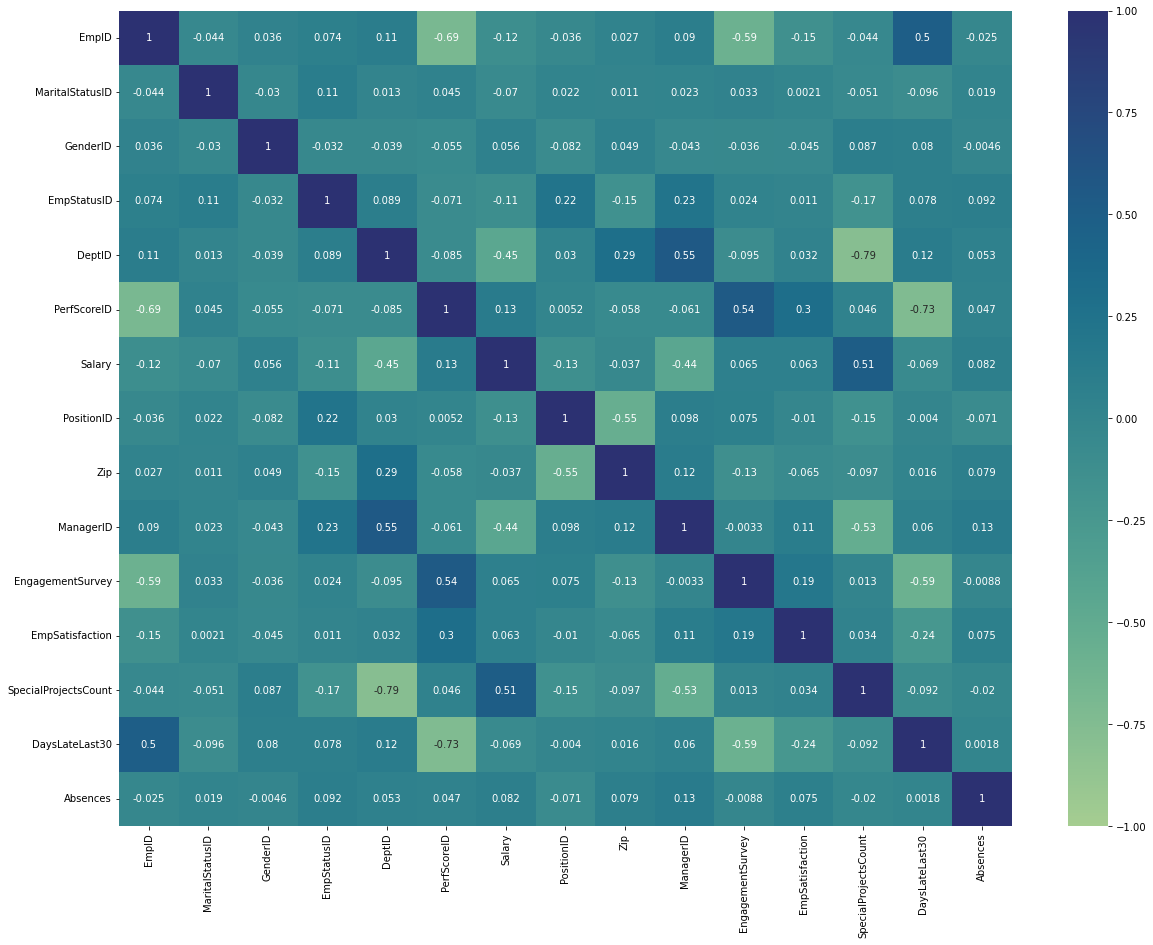

In [122]:
# Let's check main relations in numeric categories:
plt.figure(figsize = (20,15))
sns.heatmap(hr_dataset.corr(), cmap = "crest", annot = True,
            vmin = -1, vmax = 1);